## Loading the dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("Data_Cortex_Nuclear.xls")
df_cpy = df.copy(deep=True)

In [2]:
df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [3]:
df = df.drop(columns=['MouseID', 'Genotype', 'Treatment', 'Behavior'])
df_cpy.drop(columns=['MouseID', 'Genotype', 'Treatment', 'Behavior'], inplace=True)
df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.190483,NaN,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,t-SC-s
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.190463,NaN,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,t-SC-s
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.216682,NaN,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,t-SC-s
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.222263,NaN,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,t-SC-s


## Data preprocessing / PCA

### Handling missing values

In [4]:
def calc_missing_values(df):
    counts = (df
              .isnull()
              .sum())
    percentage = (counts
                  .divide(df.shape[0])  # df.shape[1] is number of columns this is rows
                  .multiply(100)
                  )
    missing = pd.concat([counts, percentage], axis=1)
    missing.columns = ["Num.", "% of missing"]
    return missing


calc_missing_values(df)

,Num.,% of missing
DYRK1A_N,3,0.277778
ITSN1_N,3,0.277778
BDNF_N,3,0.277778
NR1_N,3,0.277778
NR2A_N,3,0.277778
...,...,...
H3AcK18_N,180,16.666667
EGR1_N,210,19.444444
H3MeK4_N,270,25.000000
CaNA_N,0,0.000000


Имаме missing values со кои што треба да се справиме.

In [5]:
df = df.fillna(axis=0, method='ffill')
df = df.fillna(axis=0, method='bfill')

df = df[df['class'].notna()]


### Splitting the dataset

In [6]:
from sklearn.model_selection import train_test_split
x = df.drop('class', axis = 1) # shoud be the y target here
y = df['class'].astype('category').cat.codes
y_set = df['class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
df = df.drop(columns=['class'])
df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.178604,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.178604,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.178604,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.178604,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.178604,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,0.172645,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,0.172645,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,0.172645,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,0.172645,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


### PCA

In [7]:
# using PCA to visualize the data in 2d and 3d
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
from sklearn.preprocessing import StandardScaler

df_cpy.fillna(axis=0, method='ffill', inplace=True)
# drop all the rows where class is NaN
df_cpy = df_cpy[df_cpy['class'].notna()]
df_cpy = df_cpy[df_cpy['class'] != 'NaN']
# drop the missing values
df_cpy.dropna(axis=0, inplace=True)
df_cpy.reset_index(drop=True, inplace=True)
x = df_cpy.drop('class', axis=1)
y = df_cpy['class']
x = StandardScaler().fit_transform(x)

In [9]:
calc_missing_values(df_cpy)[calc_missing_values(df_cpy)['% of missing'] > 0]

,Num.,% of missing


In [10]:
x

array([[ 1.26665258,  0.9697562 ,  1.20250767, ..., -0.58549162,
        -0.84256315, -0.11328913],
       [ 1.14039866,  0.74971142,  0.67156832, ..., -0.63753724,
        -0.94674347,  0.09532027],
       [ 1.11307618,  0.73183551,  0.64151465, ..., -0.74730901,
        -0.9406748 ,  0.2258956 ],
       ...,
       [-0.78617608, -0.88037534, -1.7134382 , ...,  0.78294439,
         2.59873879,  0.3092002 ],
       [-0.81593443, -0.8102642 , -1.51333407, ...,  1.25668253,
         2.78122796,  0.2244719 ],
       [-0.49116763, -0.61964106, -1.2577198 , ...,  1.29262091,
         2.77987531,  0.12001763]])

In [11]:
y.unique()

array(['c-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-CS-m', 't-SC-m',
       't-CS-s', 't-SC-s'], dtype=object)

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(x)

principalDf = pd.DataFrame(data=principal_components
                           , columns=['principal component 1', 'principal component 2'])


In [13]:
principalDf

,principal component 1,principal component 2
0,5.293617,2.708455
1,1.658998,4.066208
2,1.445743,4.255943
3,3.208138,1.724742
4,-2.482288,2.903485
...,...,...
1060,-4.554449,-1.516512
1061,-3.831575,-1.915903
1062,-7.165620,-2.608673
1063,-6.046553,-3.112384


In [14]:
y = pd.DataFrame(data=y, columns=['class'])

In [15]:
final_df = pd.concat([principalDf, y], axis=1, join='outer')
final_df

,principal component 1,principal component 2,class
0,5.293617,2.708455,c-CS-m
1,1.658998,4.066208,c-CS-m
2,1.445743,4.255943,c-CS-m
3,3.208138,1.724742,c-CS-m
4,-2.482288,2.903485,c-CS-m
...,...,...,...
1060,-4.554449,-1.516512,t-SC-s
1061,-3.831575,-1.915903,t-SC-s
1062,-7.165620,-2.608673,t-SC-s
1063,-6.046553,-3.112384,t-SC-s


In [16]:
unique_classes = df_cpy['class'].unique().tolist()
unique_classes

['c-CS-m',
 'c-SC-m',
 'c-CS-s',
 'c-SC-s',
 't-CS-m',
 't-SC-m',
 't-CS-s',
 't-SC-s']

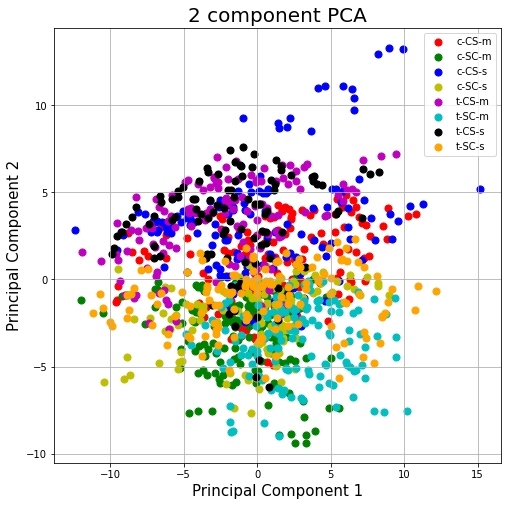

In [17]:


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

targets = ['c-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-CS-m', 't-SC-m', 't-CS-s', 't-SC-s']
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'orange']
for target, color in zip(targets, colors):
    indicesToKeep = final_df['class'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , c=color
               , s=50)
ax.legend(targets)
ax.grid()

## Clustering

In [18]:
n_classes = len(unique_classes)
n_classes

8

In [19]:
colors = ['navy', 'turquoise', 'darkorange', 'red', 'green', 'blue', 'yellow', 'black']

### Gaussian Mixture Model

In [20]:
from sklearn.mixture import GaussianMixture

In [21]:
y_set = y_set.astype('category').cat.codes
y_set

0       0
1       0
2       0
3       0
4       0
       ..
1075    7
1076    7
1077    7
1078    7
1079    7
Length: 1080, dtype: int8

In [22]:
import matplotlib as mpl

In [23]:
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

c:\Users\Alek\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
c:\Users\Alek\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


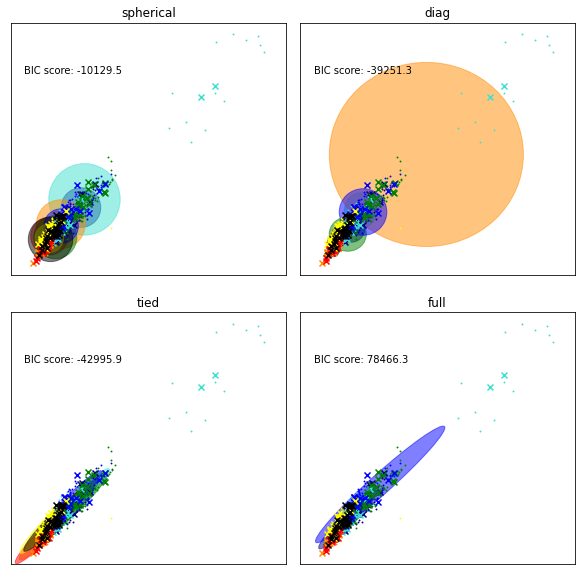

In [24]:
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)
plt.figure(figsize=(4 * n_estimators // 2, 8))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)
pred_gmm = GaussianMixture(n_components=n_classes).fit_predict(df)
for index, (name, estimator) in enumerate(estimators.items()):
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])
    
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)
    # print(X_train)
    for n, color in enumerate(colors):
        # print(X_train.shape, y_train.shape)
        data = X_train[y_train == n]
        
        plt.scatter(data.iloc[:, 0], data.iloc[:, 1], s=0.8, color=color,
                    label=unique_classes[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        
        plt.scatter(data.iloc[:, 0], data.iloc[:, 1], marker='x', color=color)


    plt.text(0.05, 0.8, 'BIC score: %.1f' % estimator.bic(X_test),
             transform=h.transAxes)
    plt.xticks(())
    plt.yticks(())
    plt.title(name)
        
        

In [25]:
from sklearn.manifold import TSNE
def tsne_train_and_visualize(model, dim=(7, 7)):
    tsne = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=1000, learning_rate=200)
    df_tsne = tsne.fit_transform(df)
    preds = model.fit_predict(df_tsne)
    plt.figure(figsize=dim)
    plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=preds, s=30, cmap='viridis')
    return preds

### K-means

In [26]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

In [27]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['P1', 'P2']

kmeans = KMeans(n_clusters=8)
pred_kmeans = kmeans.fit_predict(df_pca)

label = kmeans.labels_

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)


In [28]:
label.shape

(1080,)

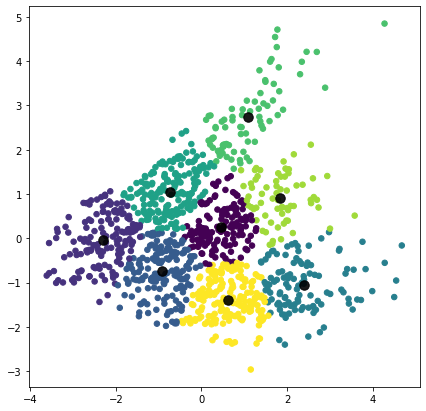

In [29]:

plt.figure(figsize=(7, 7))
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=pred_kmeans, s=30, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=90, alpha=0.9)

c:\Users\Alek\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


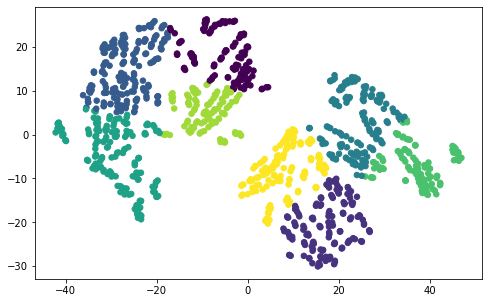

In [30]:
tsne_kmeans = KMeans(n_clusters=8)
preds_tsne_kmeans = tsne_train_and_visualize(tsne_kmeans, dim=(8, 5))


### Hierarchical clustering

In [31]:
from sklearn.cluster import AgglomerativeClustering

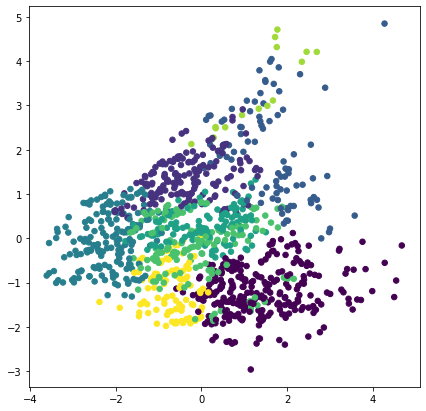

In [32]:
hierarchical = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
pred_hierarchical = hierarchical.fit_predict(df)
plt.figure(figsize=(7, 7))
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=pred_hierarchical, s=30, cmap='viridis')

c:\Users\Alek\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


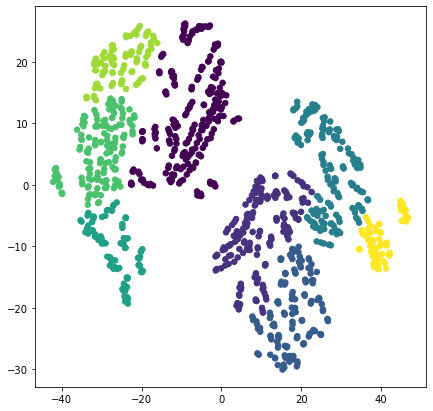

In [33]:
tsne_hierarchical = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
preds_tsne_hierarchical = tsne_train_and_visualize(tsne_hierarchical)

### DBSCAN

In [34]:
from sklearn.cluster import DBSCAN

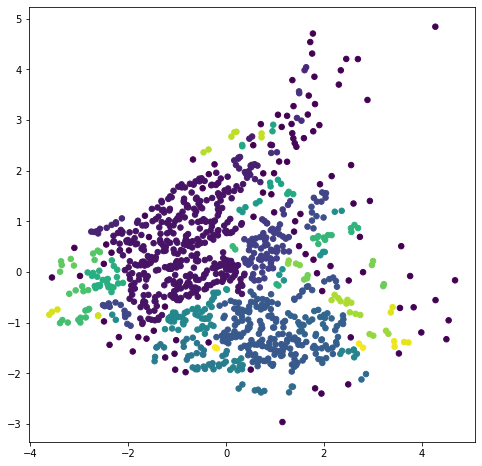

In [35]:
dbscan = DBSCAN(eps=0.15, min_samples=2, metric='euclidean', algorithm='auto')
pred_dbscan = dbscan.fit_predict(df_pca)
plt.figure(figsize=(8, 8))
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=pred_dbscan, s=30, cmap='viridis')



c:\Users\Alek\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


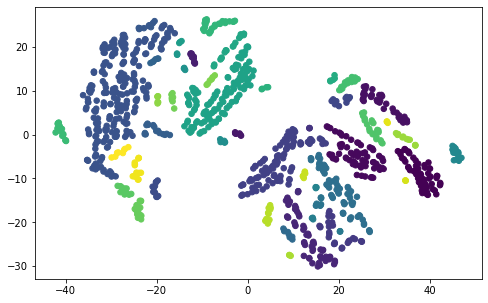

In [36]:
tsne_dbscan = DBSCAN(eps=2, min_samples=3, metric='euclidean', algorithm='auto')
preds_tsne_dbscan = tsne_train_and_visualize(tsne_dbscan, dim=(8, 5))


### Results comparison according to homogenity score

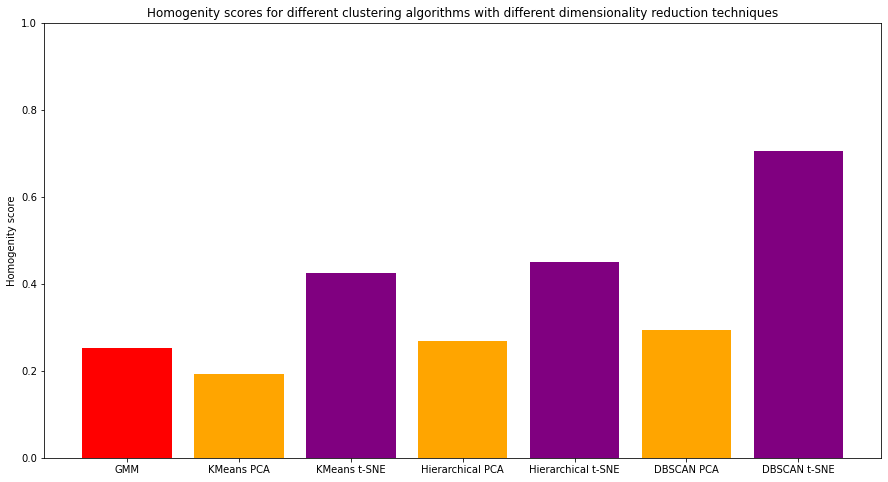

In [37]:
from sklearn.metrics.cluster import homogeneity_score
predictions = [pred_gmm, pred_kmeans, preds_tsne_kmeans, pred_hierarchical, preds_tsne_hierarchical, pred_dbscan, preds_tsne_dbscan]
names = ["GMM", "KMeans PCA", "KMeans t-SNE", "Hierarchical PCA", "Hierarchical t-SNE", "DBSCAN PCA", "DBSCAN t-SNE"]

scores = {}
for i in range(len(predictions)):
    scores[names[i]] = homogeneity_score(y_set, predictions[i])

colors = ['orange' if ('t-SNE' not in name) else 'purple' for name in names]
colors[0] = 'red'
plt.figure(figsize=(15, 8))
plt.bar(scores.keys(), scores.values(), color=colors)

# plt.rcParams['figure.figsize'] = [15, 10]


plt.ylim(0, 1)
plt.title("Homogenity scores for different clustering algorithms with different dimensionality reduction techniques")
plt.ylabel("Homogenity score")
plt.show()



Може да видиме од графикот дека подобри резултати се добиени кога користиме t-SNE за намалување на димензионалноста во споредба со PCA

## Visualization with t-SNE

Овдека пробувам да видам визуелзација со t-SNE како личат кластерите доколку сум користел PCA како метод на dimensionality reduction.
Овие ако се споредат со горните визуелзации може да се види дека има голема разлика во тоа ккао се направени кластерите во зависнот од кој метод за намалување на димензионалност се користи.

In [38]:
from sklearn.manifold import TSNE
def plot_clusters(x, predictions, title):
    tsne = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=1000, learning_rate=200)
    df_tsne = tsne.fit_transform(x)
    plt.figure(figsize=(7, 7))
    plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=predictions, s=30, cmap='viridis')
    plt.title(title)
    plt.show()

c:\Users\Alek\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


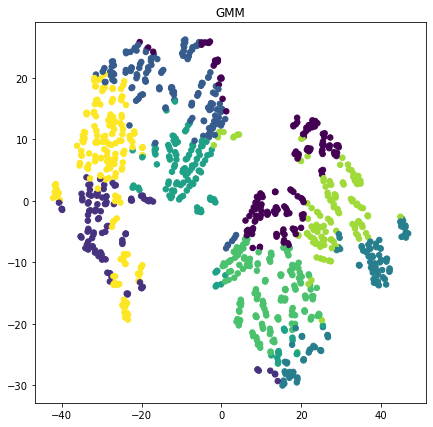

c:\Users\Alek\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


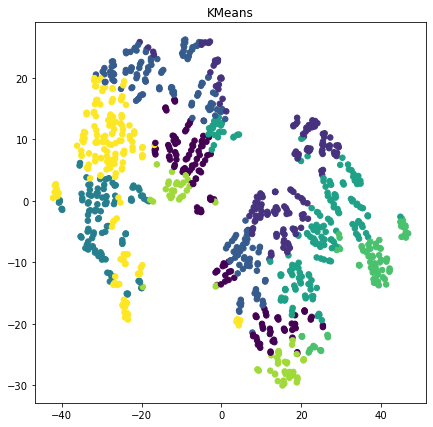

c:\Users\Alek\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


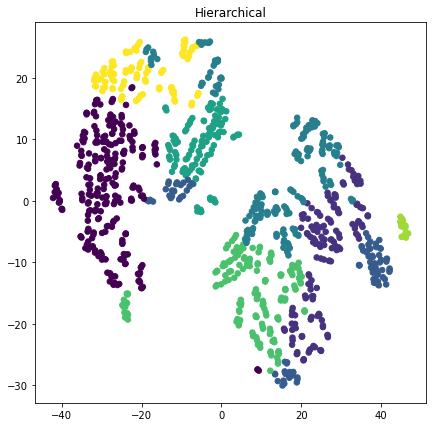

c:\Users\Alek\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


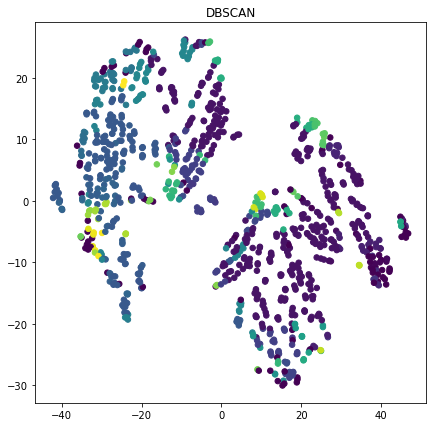

In [39]:
predictions = [pred_gmm, pred_kmeans, pred_hierarchical, pred_dbscan]
names = ['GMM', 'KMeans', 'Hierarchical', 'DBSCAN']
for pred, name in zip(predictions, names):
    plot_clusters(df, pred, name)